In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score

# X, регресори (фічі)

In [5]:
n = 1000

X = np.ones((n, 2))
X[:, 1] = np.random.normal(0, 1, size=n)

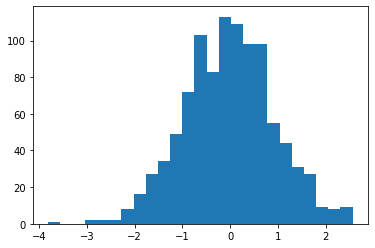

In [10]:
_ = plt.hist(X[:, 1], bins=25)

# theta (параметри)

In [12]:
b = np.array([[-2], [1]])
b.shape

(2, 1)

# Y, відгуки, таргет

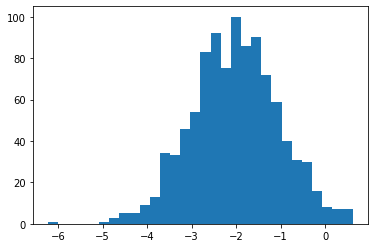

In [32]:
e = 0.2
y = (X.dot(b) + np.random.normal(0, e, size=(n, 1))).T[0]

_ = plt.hist(y, bins=30)

# scatter

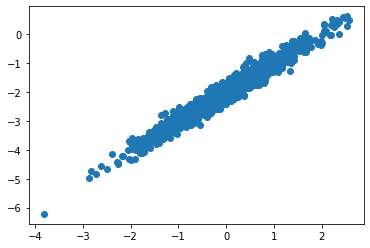

In [33]:
plt.scatter(X.T[1], y)

In [34]:
np.corrcoef(np.append(X, y[:, None], axis=1).T)

array([[       nan,        nan,        nan],
       [       nan, 1.        , 0.97849808],
       [       nan, 0.97849808, 1.        ]])

# Оцінка?

In [35]:
b_est = np.linalg.inv(X.T.dot(X) + alpha * np.diag(n)).dot(X.T.dot(y))

In [36]:
b_est, b

(array([-2.00222818,  1.00989372]),
 array([[-2],
        [ 1]]))

In [37]:
def mse(a, b):
    return ((a - b) ** 2).mean()

In [38]:
y_pred = X.dot(b_est)

In [39]:
mse(y_pred, y), e ** 2

(0.04056398969890391, 0.04000000000000001)

$$\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2\substack{P\\ \to}\sigma_\varepsilon^2$$

In [40]:
r2_score(y, y_pred)

0.9574585001622089

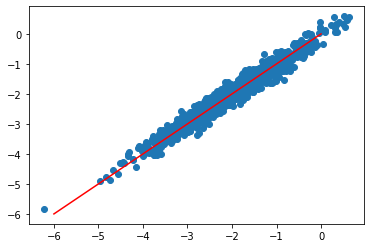

In [43]:
plt.scatter(y, y_pred)
plt.plot([-6, 0], [-6, 0], color='red')

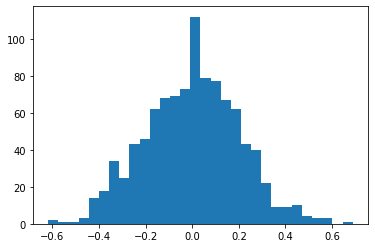

In [46]:
_ = plt.hist(y - y_pred, bins=30)

In [47]:
me = (y - y_pred).mean()
me

-4.534150832569139e-16

In [49]:
(y - y_pred).var(), mse(y_pred, y)

(0.0405639896989039, 0.04056398969890391)